# Project Title : Seoul Bike Sharing Demand Prediction

## <b> Problem Description </b>

### In this assignment,  develop a predictive model for the number of rented bikes in Seoul using the Seoul Bike Sharing Demand dataset. Important point is model need to be multi linear regression model and if it's possible achieve a higher R2 by using appropriate transformations on the predictors, or fine-tuning your model.

## EDA

Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import warnings
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Loading the dataset

In [2]:
data= pd.read_csv("data/SeoulBikeData.csv", encoding = "ISO-8859-1")

In [3]:
# Copy the data for backup
df = data.copy()

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Data shape
df.shape

(8760, 14)

In [6]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Statistical info 
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,30/11/2018,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


In [8]:
df.isnull().sum().transpose()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Data Description
there is no missing value
- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour: target
- Hour - Hour of the day when bike is rented
- Temperature-Temperature of date, celcious
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature(이슬점) Celsius
- Solar radiation - MJ/m2, 태양 복사에너지
- Rainfall - mm
- Snowfall - cm 적설량 
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours): 정상 운행여부

### Preprocessing the data

In [9]:
# Checking null values of data 
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
# Checking duplicate
df.duplicated().sum()
df[df.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


In [11]:
# converting date column dtype object to date 
df['Date']= pd.to_datetime(df['Date'], dayfirst=True)

In [12]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")     # extract year from Date column and convert it in object type 

In [13]:
# drop the Date column
df.drop(columns=['Date'],inplace=True)

In [14]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

In [16]:
# convert Hour column integer to Categorical 
# Hour는 빌린 시간을 의미하지만 categorical로 해석하는게 맞음, 어느 시간대인지가 중요하지 숫자상 의미는 X
df['Hour']=df['Hour'].astype('object')

In [17]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [18]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [19]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Friday,December,2017
1,1,Winter,No Holiday,Yes,Friday,December,2017
2,2,Winter,No Holiday,Yes,Friday,December,2017
3,3,Winter,No Holiday,Yes,Friday,December,2017
4,4,Winter,No Holiday,Yes,Friday,December,2017


In [20]:
categorical_features['Functioning Day'].value_counts()

Functioning Day
Yes    8465
No      295
Name: count, dtype: int64

### Visualiztion and numerical

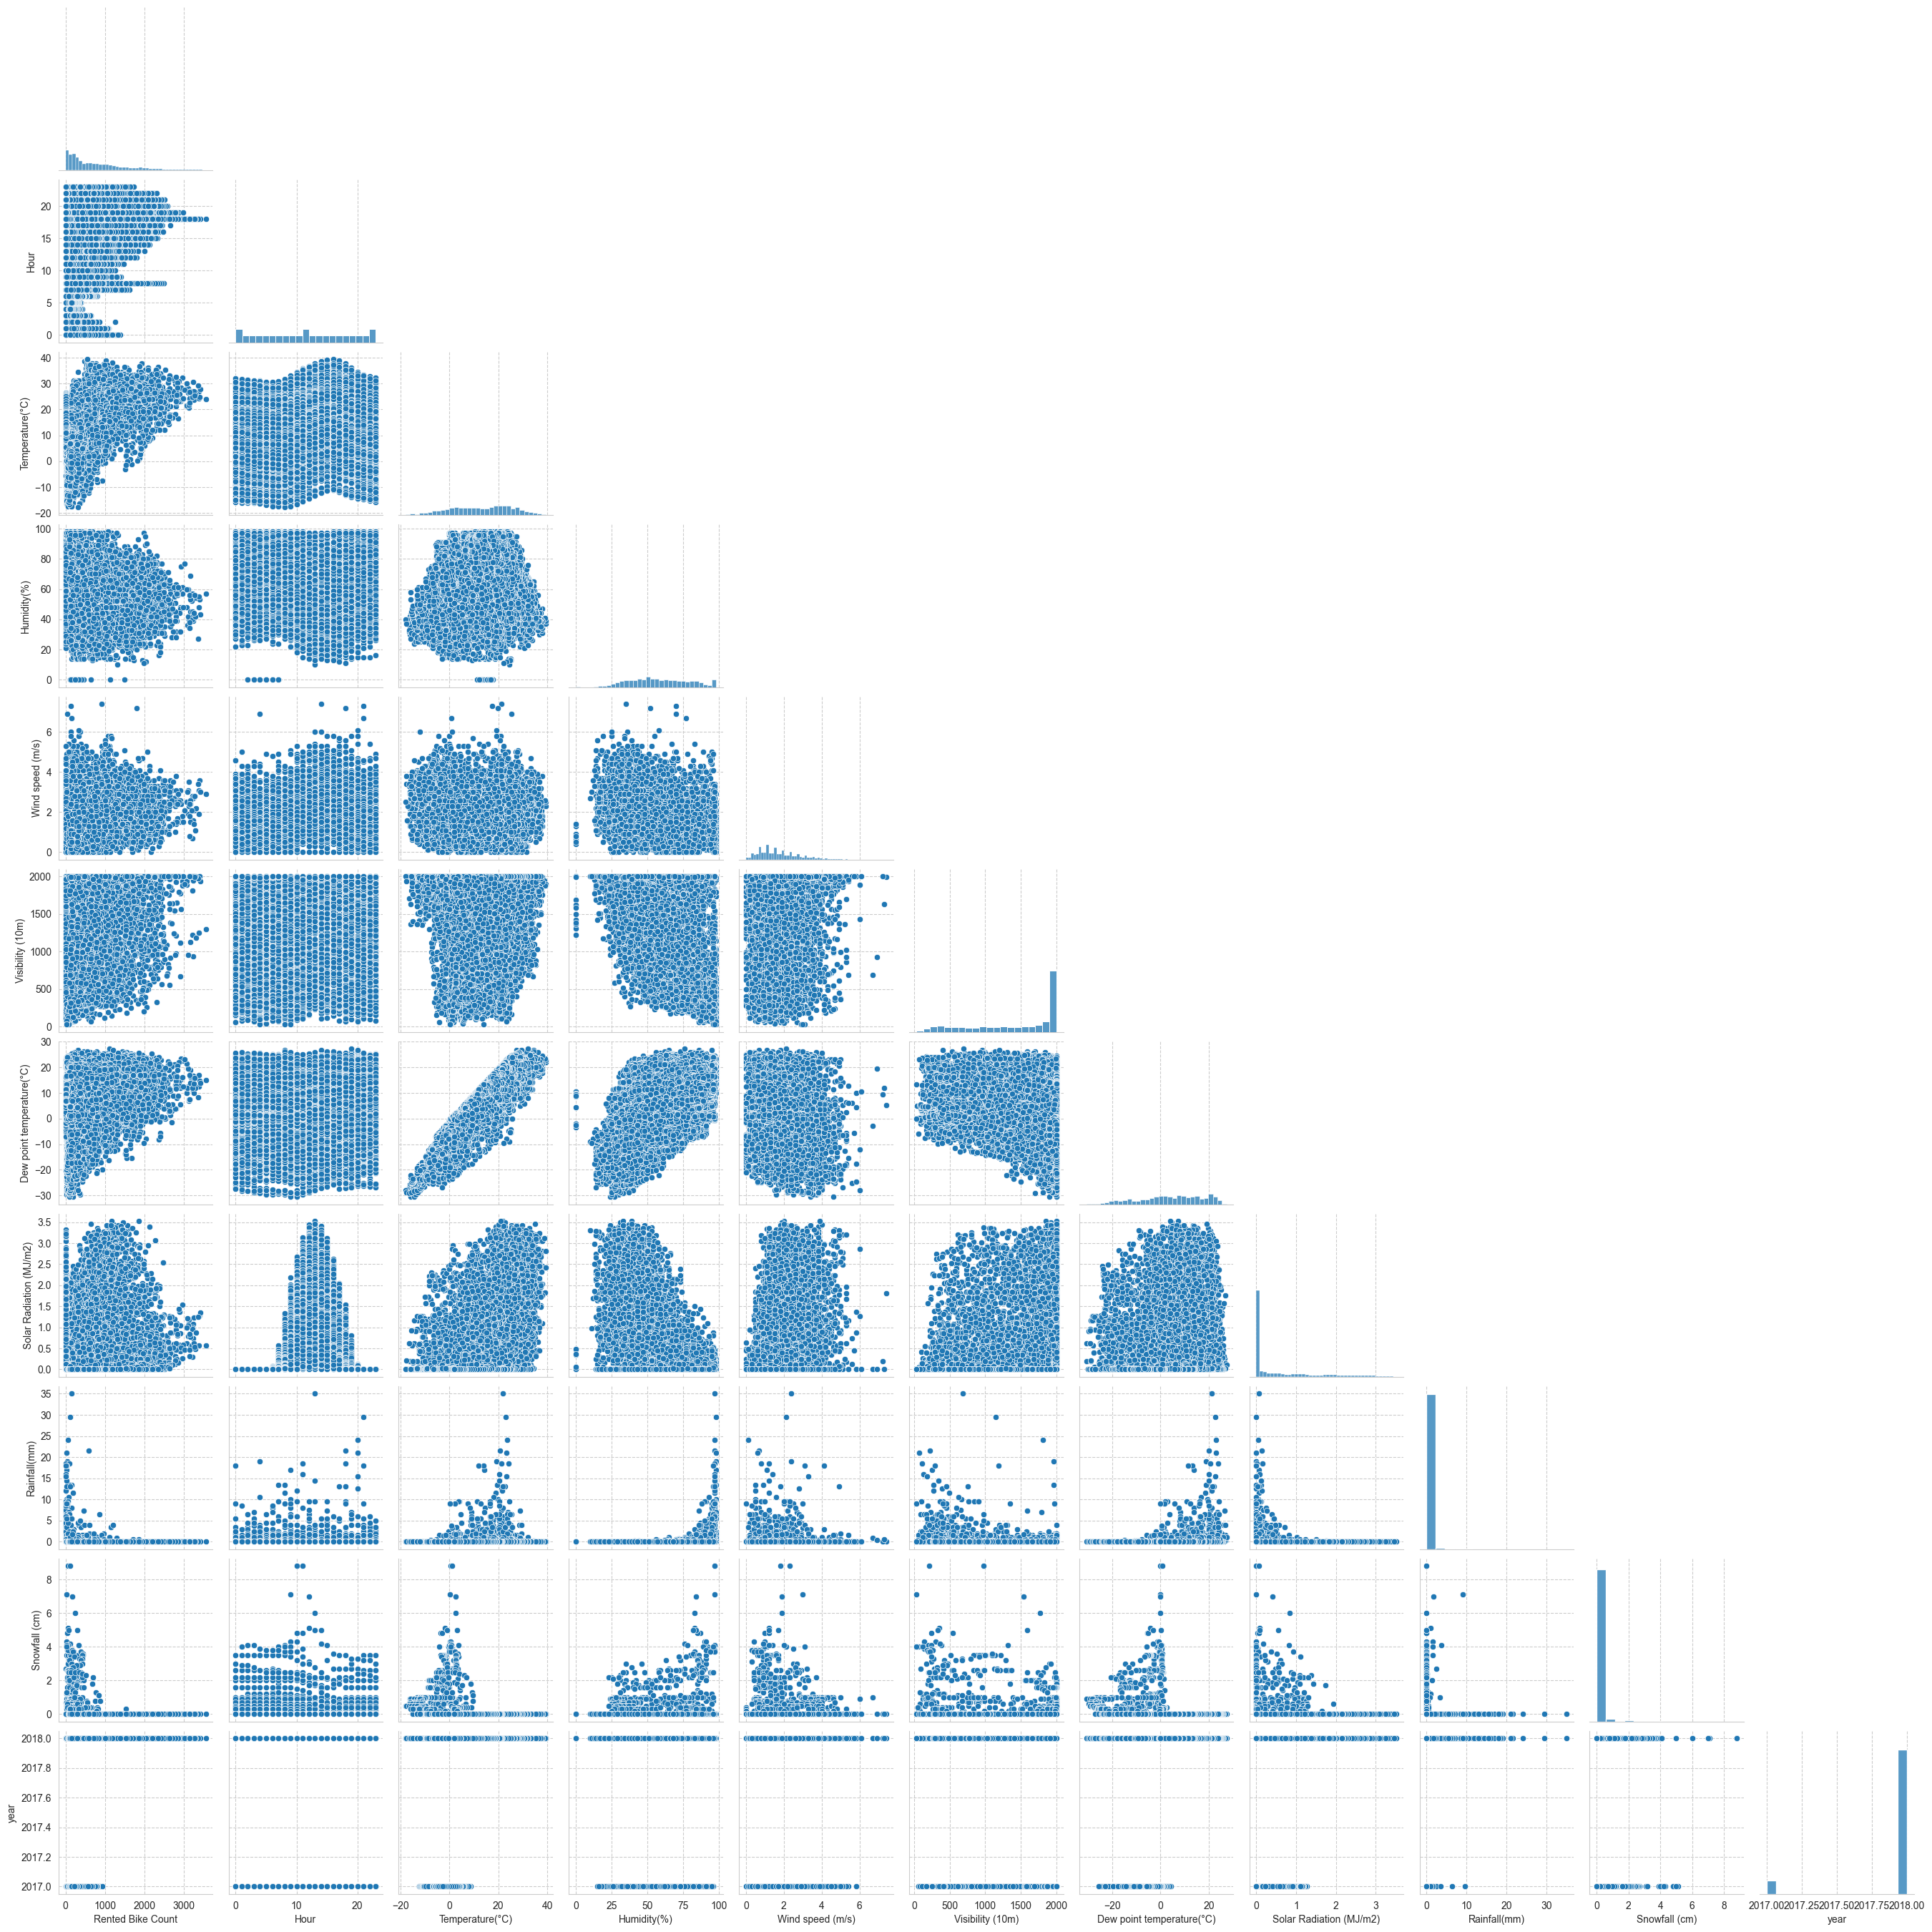

In [21]:
#ploting pairplot for more info
sns.pairplot(df, corner=True)

🎯 1. 타깃 변수 (Rented Bike Count)와의 관계
Temperature(°C):

양의 관계가 뚜렷하게 관찰됨 (기온이 높을수록 대여량 증가)

매우 명확한 비선형 추세 → 선형회귀 사용 시 다항식 또는 트리 기반 모델 고려

Dew point temperature(°C):

역시 기온과 비슷한 형태의 양의 관계

→ Temperature와 높은 상관관계를 가지므로 다중공선성 주의

Solar Radiation (MJ/m²):

0값이 많아 뾰족한 분포 형태이지만, 대여량 증가와 연관 있음

좋은 날씨일수록 자전거 대여량 증가

Hour:

뚜렷한 이중 봉우리(Bimodal) 분포 → 출근·퇴근 시간 수요 반영

명확한 비선형성

Humidity(%), Rainfall(mm), Snowfall(cm):

음의 관계 보임

특히 Rainfall, Snowfall은 0 근처의 값이 대부분이지만 강수/적설 시 수요 급감

→ 강한 억제 효과 존재

🔁 2. 독립 변수들 간의 상관성 (공선성 가능성)
Temperature ↔ Dew point temperature:

매우 강한 선형관계 → 다중공선성 문제 있음

둘 중 하나만 사용하는 것이 안정적

Rainfall / Snowfall / Solar Radiation:

서로 다른 분포, 크게 상관은 없으나 모두 0 중심의 희소 데이터

→ 로그 변환 또는 이진화도 고려 가능

Humidity ↔ Dew Point:

온도 정보와 결합된 변수들이므로 주의

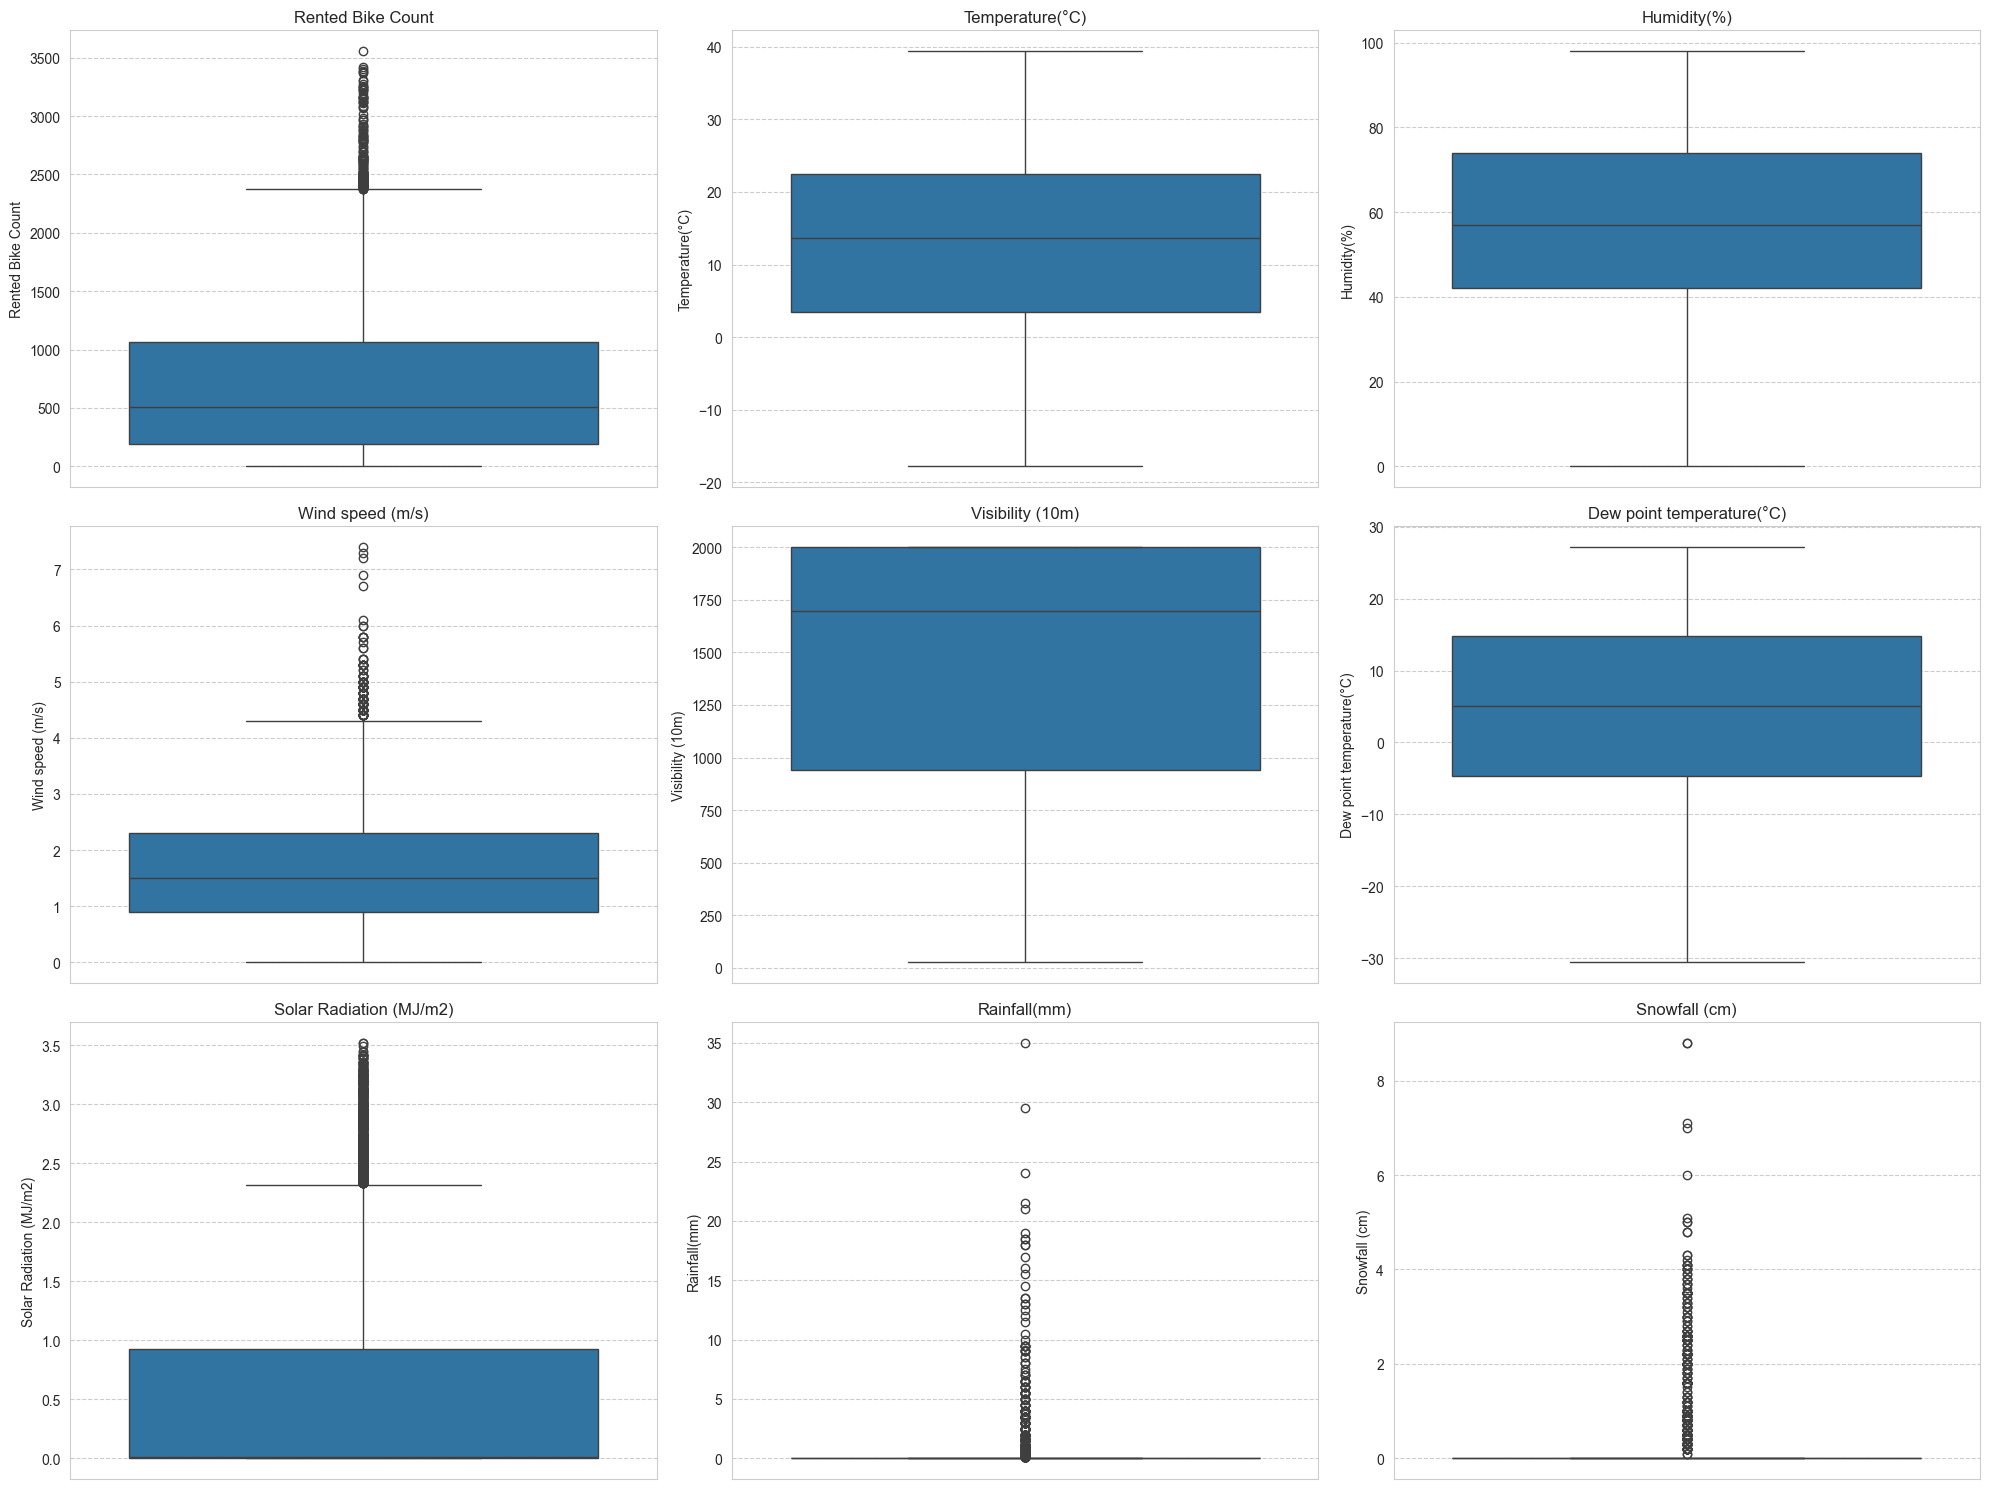

In [22]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

| 변수명                            | 분포 및 특징                               | 이상치 여부                          | 해석                              |
| ------------------------------ | ------------------------------------- | ------------------------------- | ------------------------------- |
| **Rented Bike Count**          | 강한 우측 꼬리(long right tail), 중위수는 약 500 | ✅ 다수 이상치 존재 (2000 이상)           | 인기 시간대에서 폭증하는 수요 존재 가능성 (출퇴근 등) |
| **Temperature (°C)**           | 적절한 범위 (약 -15°C \~ 35°C), 거의 대칭 분포    | ❌ 이상치 없음                        | 계절성을 잘 반영한 기온                   |
| **Humidity (%)**               | 대체로 대칭, 중간값 약 60%                     | ❌ 이상치 없음                        | 예측에 유용한 습도 정보                   |
| **Wind speed (m/s)**           | 편향 분포, 약 4\~5m/s 이상 값이 이상치로 처리됨       | ✅ 다수 존재                         | 고풍속은 극히 드물며, 실제 이상값 가능성 있음      |
| **Visibility (10m)**           | 2000 근처에 몰려 있음, 일부 낮은 값 존재            | ❌ 이상치 없음 (시각적으로 밀집되어 있지만 정상 범위) | 시정 거리 정보, 낮을수록 나쁨               |
| **Dew point temperature (°C)** | 중간값은 5\~10도, 적절한 범위                   | ❌ 없음                            | 온도와 밀접한 관계, 다중공선성 주의            |
| **Solar Radiation (MJ/m²)**    | 대부분 0에 가까움, 극소수 높은 값 존재               | ✅ 이상치 존재 (3 이상 값)               | 흐린 날이 많고, 맑은 날에만 극단적 값 발생       |
| **Rainfall (mm)**              | 대부분 0, 소수의 큰 값 존재                     | ✅ 존재 (20\~30mm 등)               | 폭우나 장마일 수 있음                    |
| **Snowfall (cm)**              | 대부분 0, 소수의 큰 값 존재                     | ✅ 존재 (5\~8cm 이상)                | 겨울철 특이 이벤트 가능성 있음               |


### Categorical feature 분석

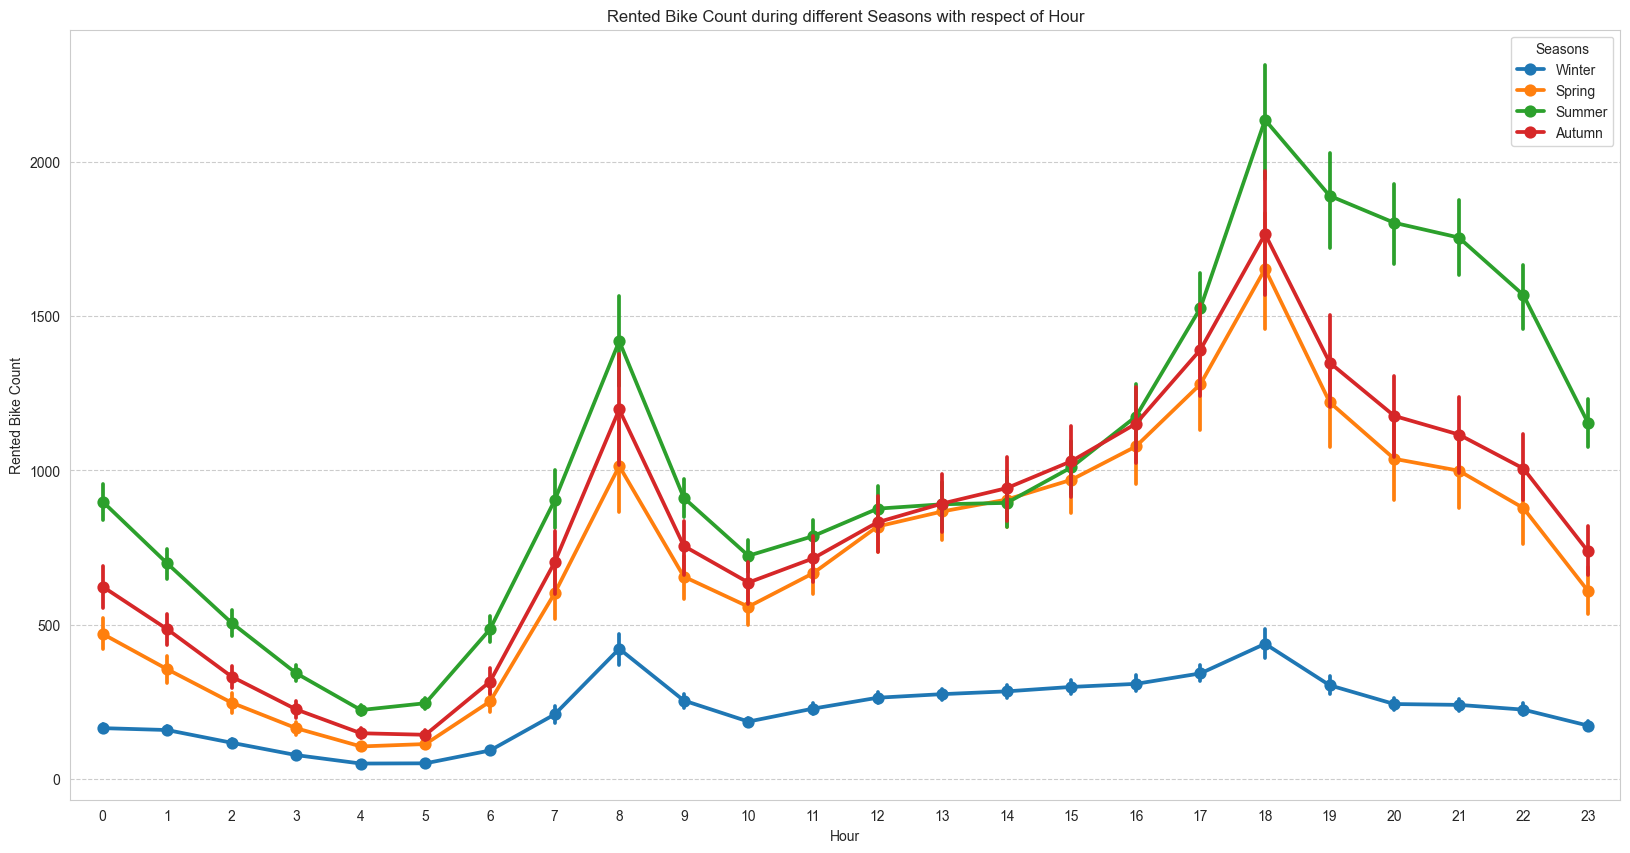

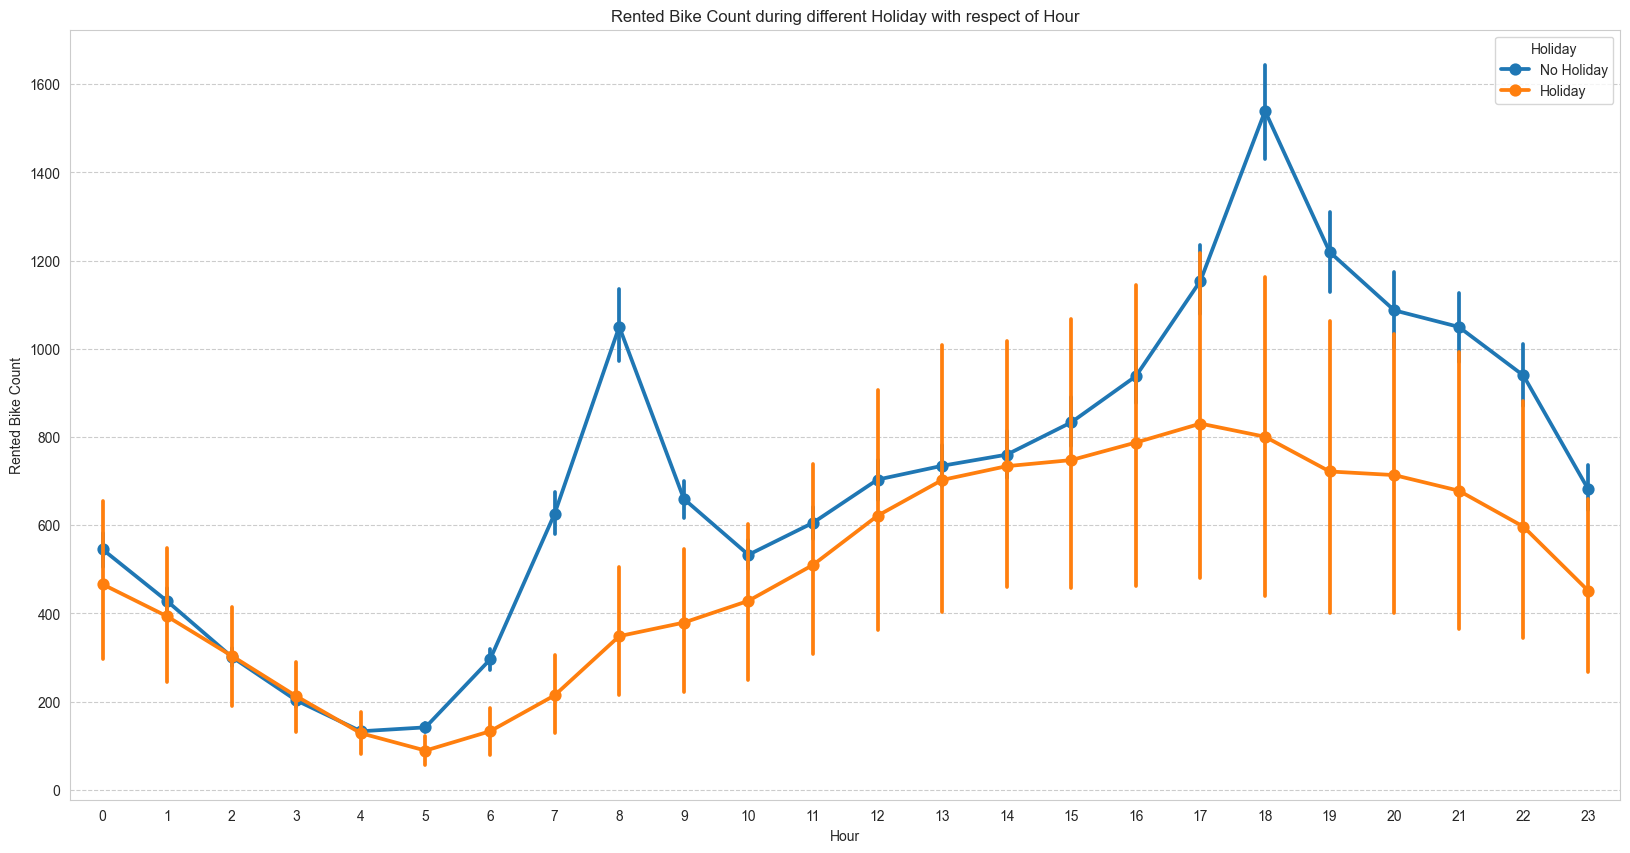

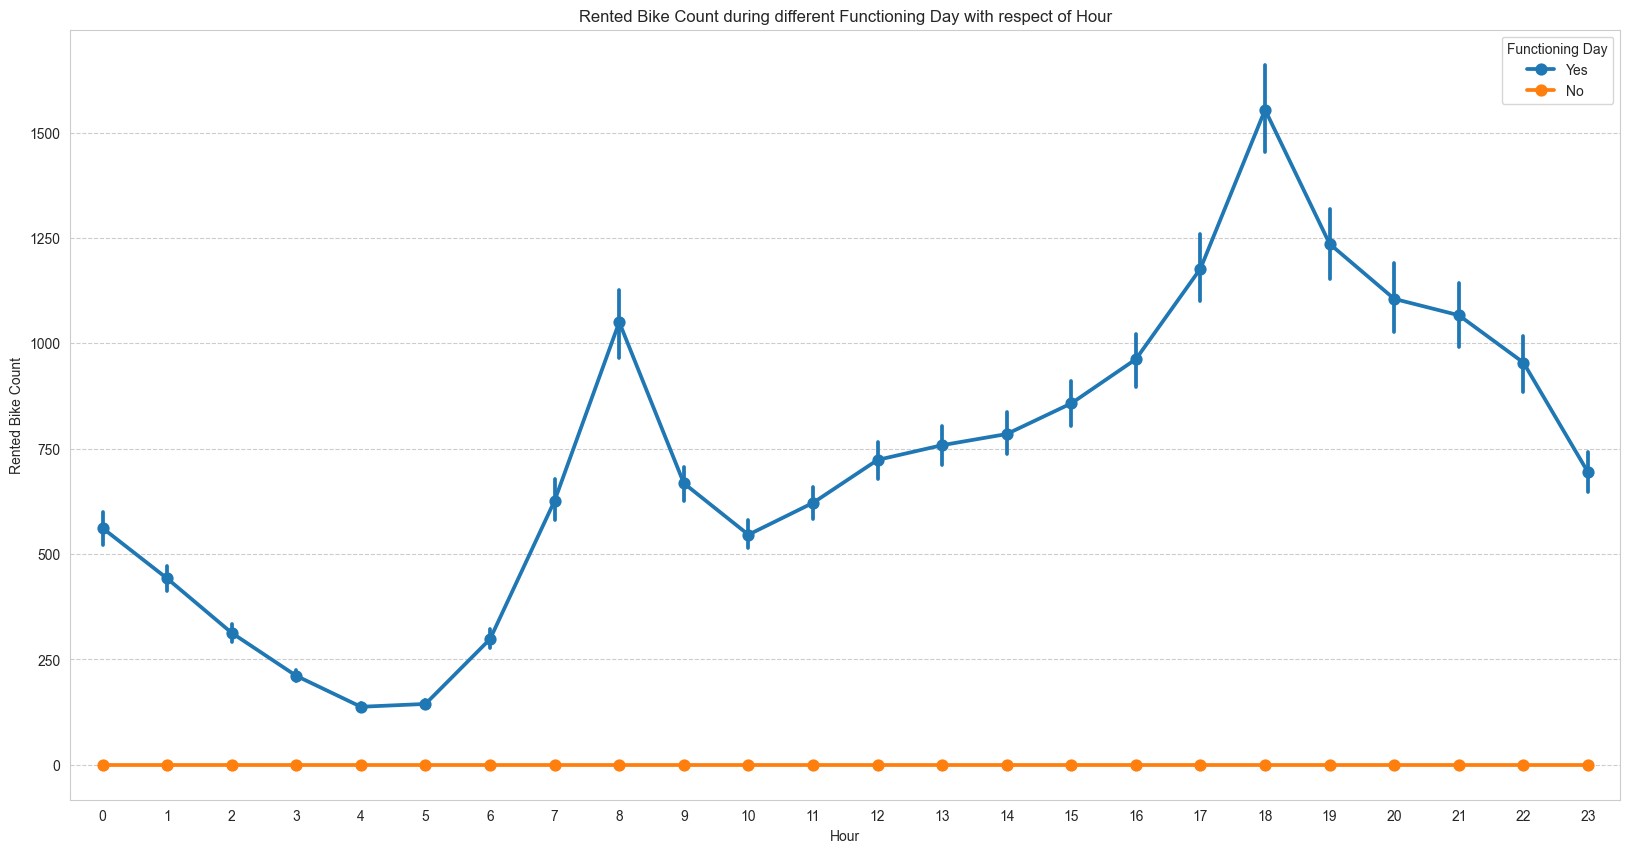

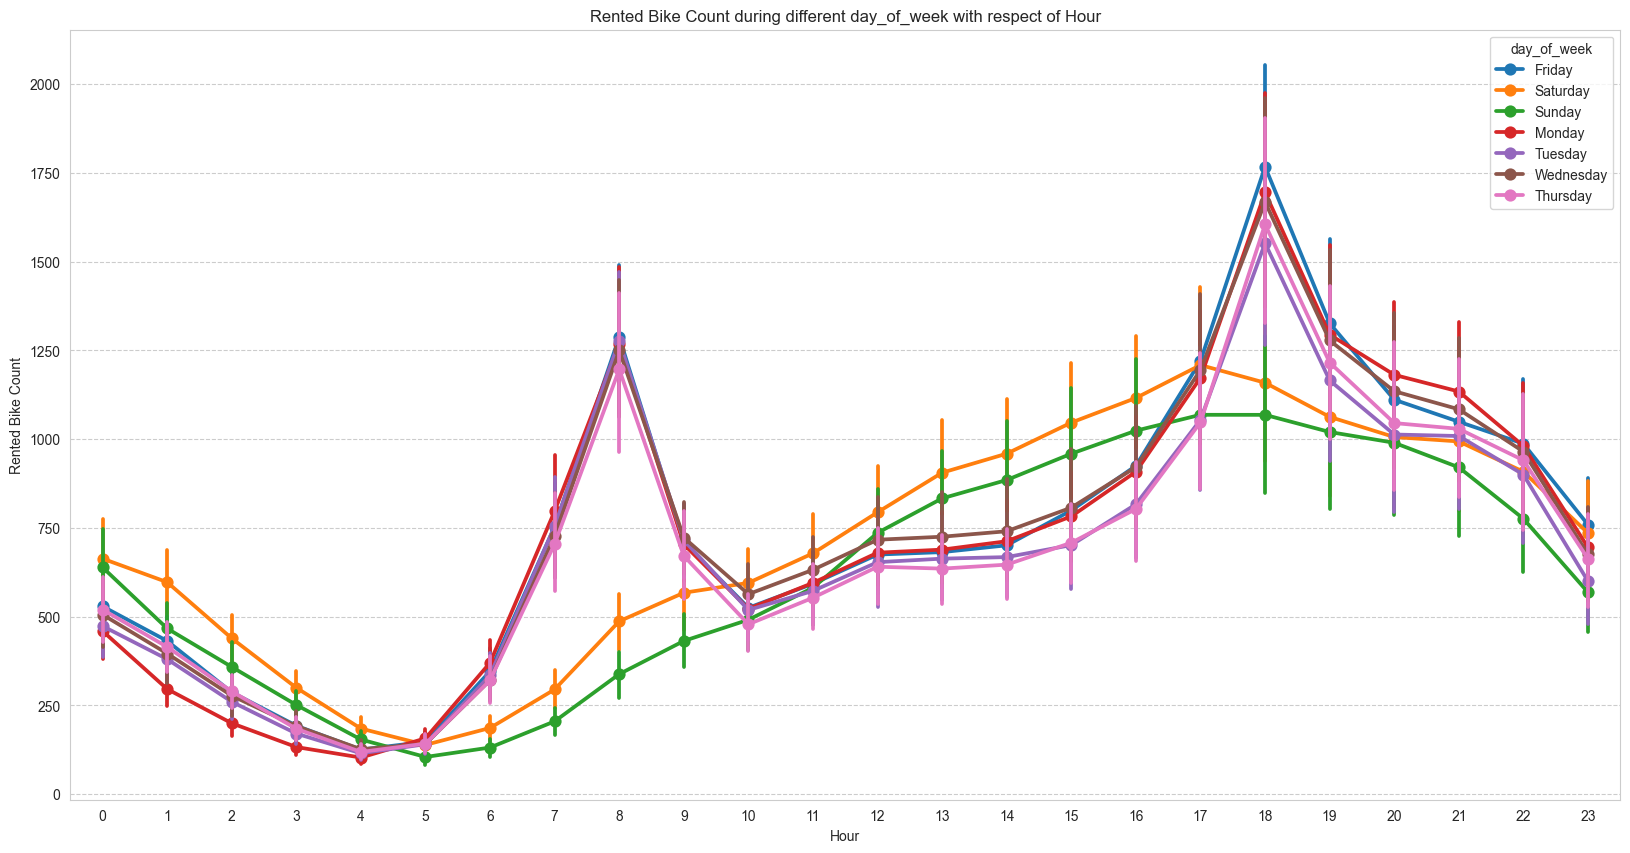

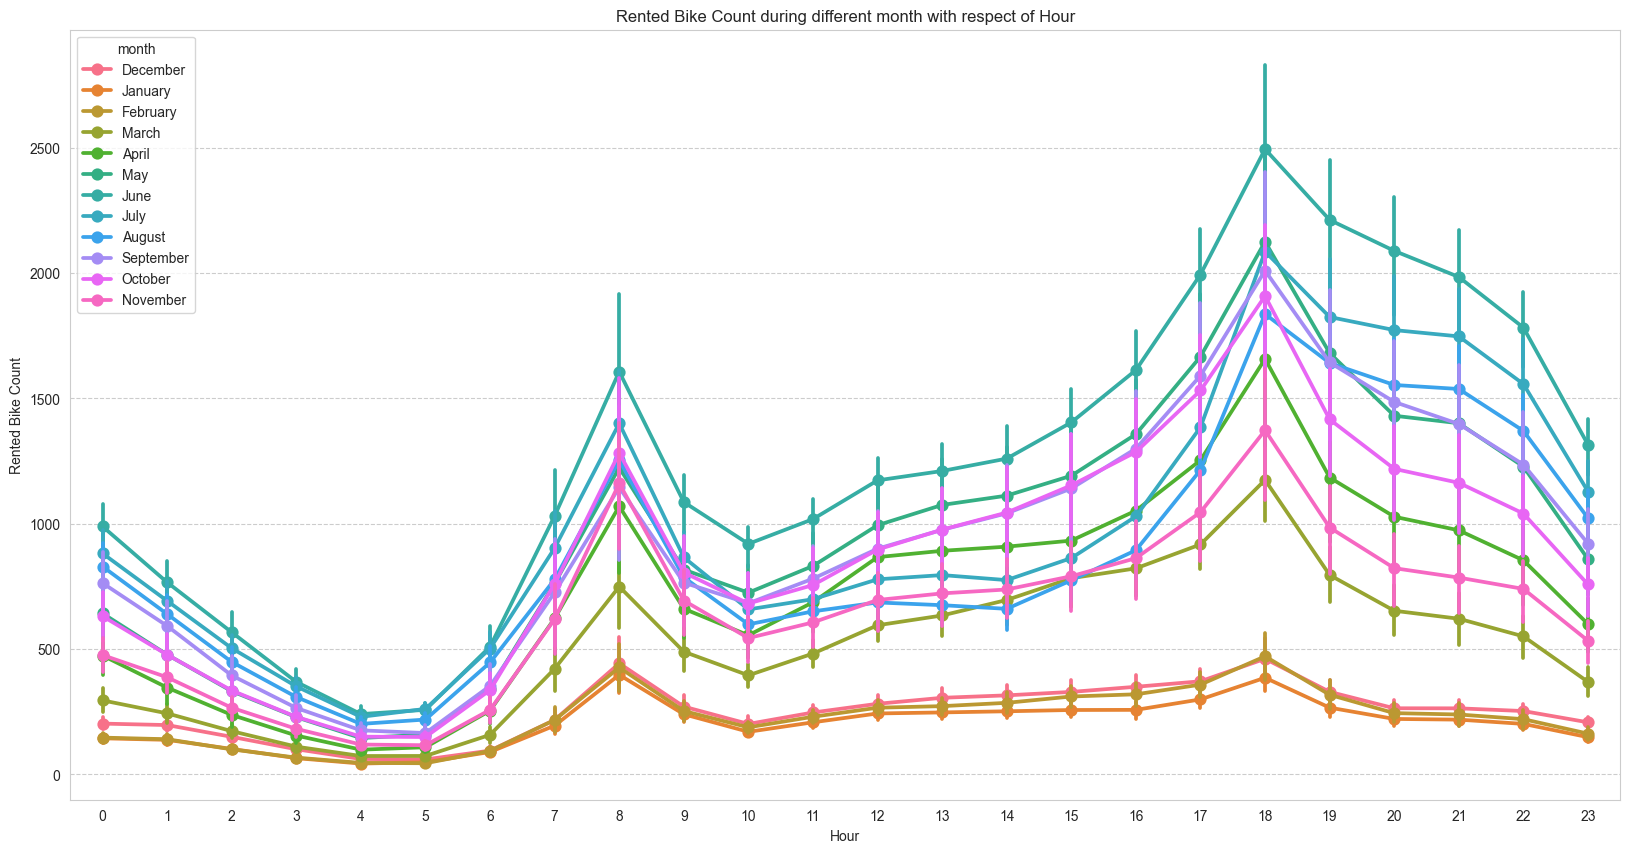

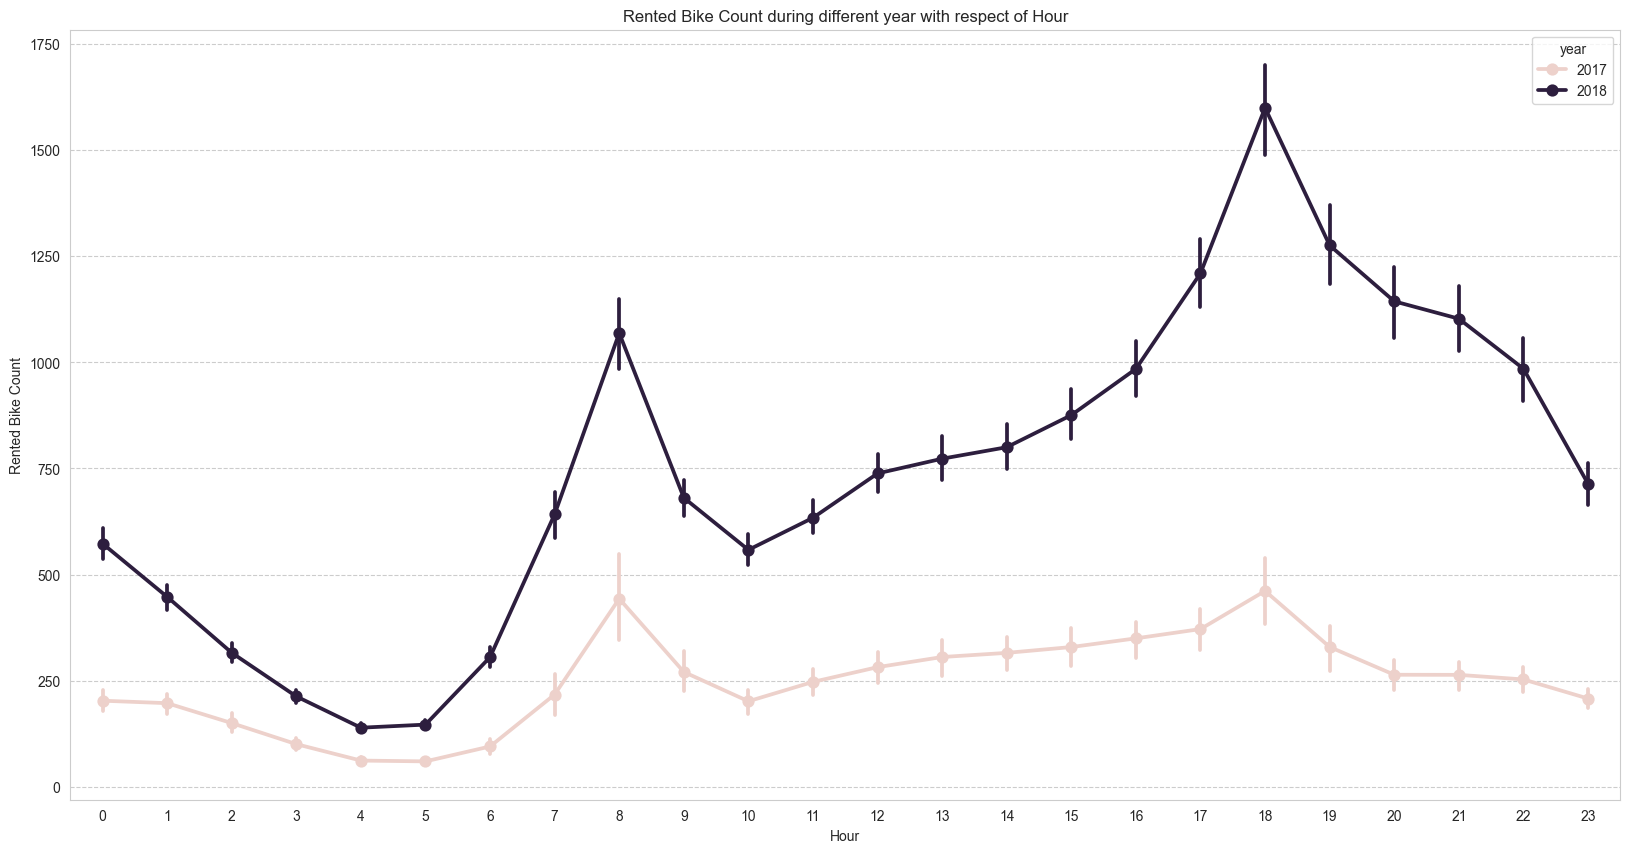

In [23]:
#point plots with Rented Bike Count during different categorical features with respect of Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

EDA for cat results

## Season 
In the season column, demand is low at winter, others are seems similar. 

## Holiday
During holiday the demand is lower than non-holiday, 
It's seems like many people use bike for going work

## Functioning Day
If it is  no Functioning Day then there is no demand -> 당연
So, we need to delete no functioning date for the column(it can't be the feature)

## Days of week
평일(Mon–Fri): 출퇴근 피크 (08시, 18시)가 선명함
주말(Sat, Sun): 피크가 낮고 오후 시간대(13~17시)에 고르게 분포
금요일(Fri)은 퇴근 후 대여량이 다른 평일보다 더 높음
→ 요일은 대여 목적을 구분할 수 있는 중요한 변수 (출근/레저) + 주말로 따로 분류하는것도 가능할듯

## month 
In the month column, We can clearly see that the demand is low in December January & Febuary. 
Beacause it is winter season. Month and season seems like they have similar info

## year
the demand of 2018 get bigger

In [24]:
# Converting days of weeks in Two variable from Monaday to Friday in Weekdays and Saturday and Sunday to Weekend
df['week'] = df['day_of_week'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'Weekdays')

In [25]:
# value counts of Week column
df.week.value_counts()

week
Weekdays    6264
Weekend     2496
Name: count, dtype: int64

Text(0.5, 1.0, 'Rented Bike Count during weekday and weekend with respect of Hour')

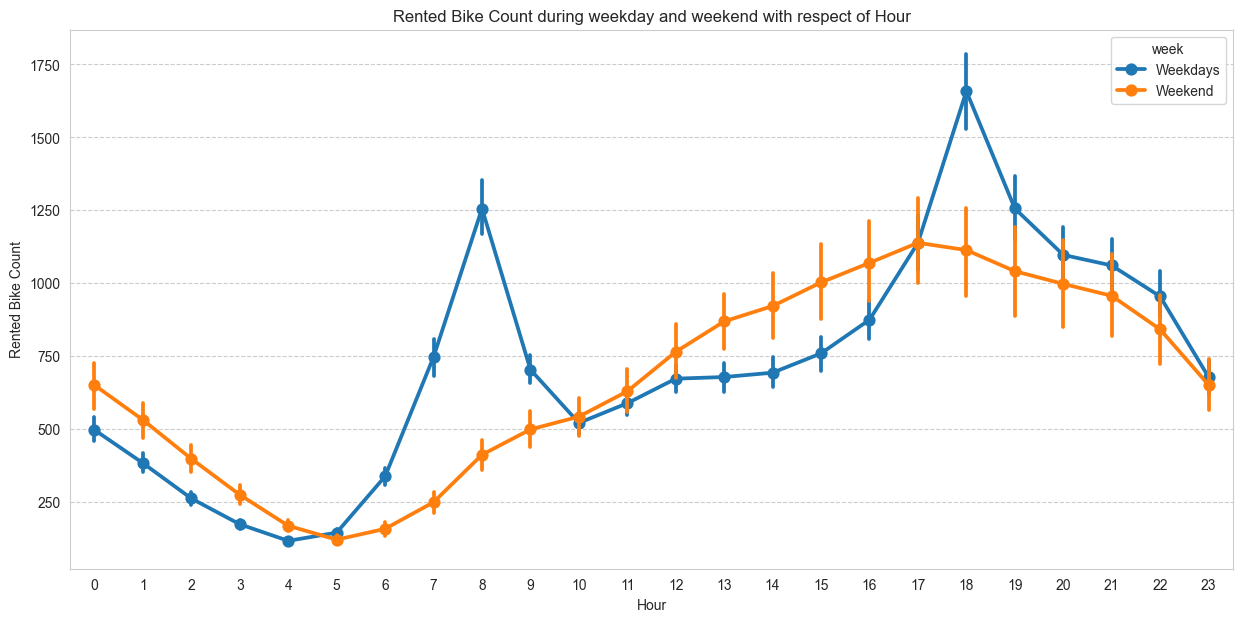

In [26]:
plt.figure(figsize=(15,7))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df['week'])
plt.title("Rented Bike Count during weekday and weekend with respect of Hour")

In [27]:
# droping the days of week column from df and from categorical feature 
df.drop(columns=['day_of_week'], inplace=True)
categorical_features.drop(columns=['day_of_week'], inplace=True)